Mannual SVM

     pcost       dcost       gap    pres   dres
 0: -1.1979e+00 -2.4337e+00  1e+01  3e+00  2e+00
 1: -1.9168e+00 -2.1250e+00  3e+00  6e-01  4e-01
 2: -9.2454e-01 -1.2202e+00  3e-01  5e-16  8e-15
 3: -9.9714e-01 -1.0027e+00  6e-03  2e-16  8e-15
 4: -9.9997e-01 -1.0000e+00  6e-05  6e-17  2e-15
 5: -1.0000e+00 -1.0000e+00  6e-07  2e-16  4e-15
Optimal solution found.
Alphas: [4.29184904e-08 9.99999939e-01 8.33386184e-09 7.99999949e-01
 9.19957782e-08 1.99999950e-01]
Support vectors: [1 3 5]
Weight vector w: [-0.99999955  1.00000009]
Bias b: 4.999996855890123


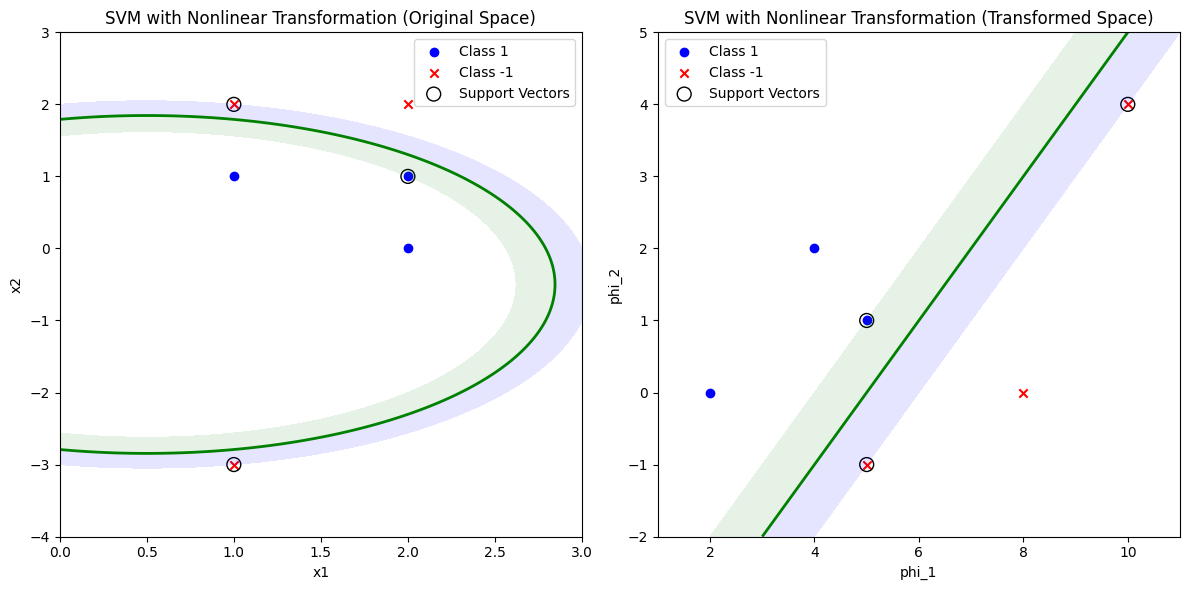

In [7]:
import numpy as np
import cvxopt
import matplotlib.pyplot as plt

# Given data points and their labels
X = np.array([
    [1, 1],
    [2, 1],
    [2, 0],
    [1, 2],
    [2, 2],
    [1, -3]
])

y = np.array([1, 1, 1, -1, -1, -1])

# Define the nonlinear transformation function
def phi(x):
    return np.array([x[0]**2 + x[1]**2, x[0] - x[1]])

# Transform the data points
phi_X = np.array([phi(x) for x in X])

# Calculate the kernel matrix
K = np.dot(phi_X, phi_X.T)

# Convert y to a column vector
y = y.reshape(-1, 1)

# Define the parameters for the QP solver
P = cvxopt.matrix(np.outer(y, y) * K, tc='d')
q = cvxopt.matrix(-np.ones(6), tc='d')
G = cvxopt.matrix(-np.eye(6), tc='d')
h = cvxopt.matrix(np.zeros(6), tc='d')
A = cvxopt.matrix(y.T, (1, 6), 'd')
b = cvxopt.matrix(0.0, tc='d')

# Solve the QP problem
solution = cvxopt.solvers.qp(P, q, G, h, A, b)
alphas = np.ravel(solution['x'])

# Find the support vectors
support_vectors = np.where(alphas > 1e-5)[0]

# Compute the weight vector w
w = np.sum(alphas[support_vectors].reshape(-1, 1) * y[support_vectors] * phi_X[support_vectors], axis=0)

# Compute the bias term b using only the support vectors
b_values = []
for sv in support_vectors:
    b_sv = y[sv] - np.sum(alphas[support_vectors] * y[support_vectors].flatten() * K[sv, support_vectors])
    b_values.append(b_sv)

b = np.mean(b_values)

print("Alphas:", alphas)
print("Support vectors:", support_vectors)
print("Weight vector w:", w)
print("Bias b:", b)

# Plot the results in the original space
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
# Plot the original points
for i in range(len(X)):
    if y[i] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='b', marker='o', label='Class 1' if i == 0 else "")
    else:
        plt.scatter(X[i, 0], X[i, 1], color='r', marker='x', label='Class -1' if i == 3 else "")

# Plot the support vectors
plt.scatter(X[support_vectors, 0], X[support_vectors, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')

# Plot the decision boundary in the transformed space
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Calculate the decision boundary
Z = np.dot(np.array([phi([x1, x2]) for x1, x2 in zip(xx.ravel(), yy.ravel())]), w) + b
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.1, colors=['blue', 'green', 'red'])
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='green')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('SVM with Nonlinear Transformation (Original Space)')

# Plot the results in the transformed space
plt.subplot(1, 2, 2)
for i in range(len(phi_X)):
    if y[i] == 1:
        plt.scatter(phi_X[i, 0], phi_X[i, 1], color='b', marker='o', label='Class 1' if i == 0 else "")
    else:
        plt.scatter(phi_X[i, 0], phi_X[i, 1], color='r', marker='x', label='Class -1' if i == 3 else "")

# Plot the support vectors in the transformed space
plt.scatter(phi_X[support_vectors, 0], phi_X[support_vectors, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')

# Plot the decision boundary in the transformed space
phi_x_min, phi_x_max = phi_X[:, 0].min() - 1, phi_X[:, 0].max() + 1
phi_y_min, phi_y_max = phi_X[:, 1].min() - 1, phi_X[:, 1].max() + 1
phi_xx, phi_yy = np.meshgrid(np.linspace(phi_x_min, phi_x_max, 500), np.linspace(phi_y_min, phi_y_max, 500))

# Calculate the decision boundary in the transformed space
Z_phi = np.dot(np.c_[phi_xx.ravel(), phi_yy.ravel()], w) + b
Z_phi = Z_phi.reshape(phi_xx.shape)

plt.contourf(phi_xx, phi_yy, Z_phi, levels=[-1, 0, 1], alpha=0.1, colors=['blue', 'green', 'red'])
plt.contour(phi_xx, phi_yy, Z_phi, levels=[0], linewidths=2, colors='green')

plt.xlabel('phi_1')
plt.ylabel('phi_2')
plt.legend()
plt.title('SVM with Nonlinear Transformation (Transformed Space)')

plt.tight_layout()
plt.show()


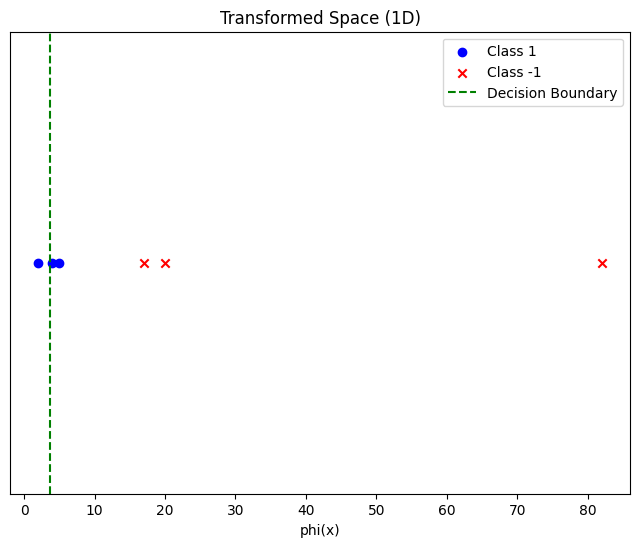

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Nonlinear transformation function
def phi(x):
    return x[0]**2 + x[1]**4

# Original data points
X = np.array([
    [1, 1],
    [2, 1],
    [2, 0],
    [1, 2],
    [2, 2],
    [1, -3]
])

y = np.array([1, 1, 1, -1, -1, -1])

# Transform the data points
phi_X = np.array([phi(x) for x in X])

# Plot the transformed data points in 1D
plt.figure(figsize=(8, 6))
for i in range(len(phi_X)):
    if y[i] == 1:
        plt.scatter(phi_X[i], 0, color='b', marker='o', label='Class 1' if i == 0 else "")
    else:
        plt.scatter(phi_X[i], 0, color='r', marker='x', label='Class -1' if i == 3 else "")

plt.axvline(x=np.mean(phi_X[y == 1]), color='green', linestyle='--', label='Decision Boundary')
plt.xlabel('phi(x)')
plt.yticks([])
plt.legend()
plt.title('Transformed Space (1D)')
plt.show()


# Q2

In [10]:
!gdown 1nJ7HVGtPlJuuHmz6RsWZ5TJjwuZv549d

Downloading...
From: https://drive.google.com/uc?id=1nJ7HVGtPlJuuHmz6RsWZ5TJjwuZv549d
To: /content/MJMusicDataset.csv
100% 815k/815k [00:00<00:00, 90.2MB/s]


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


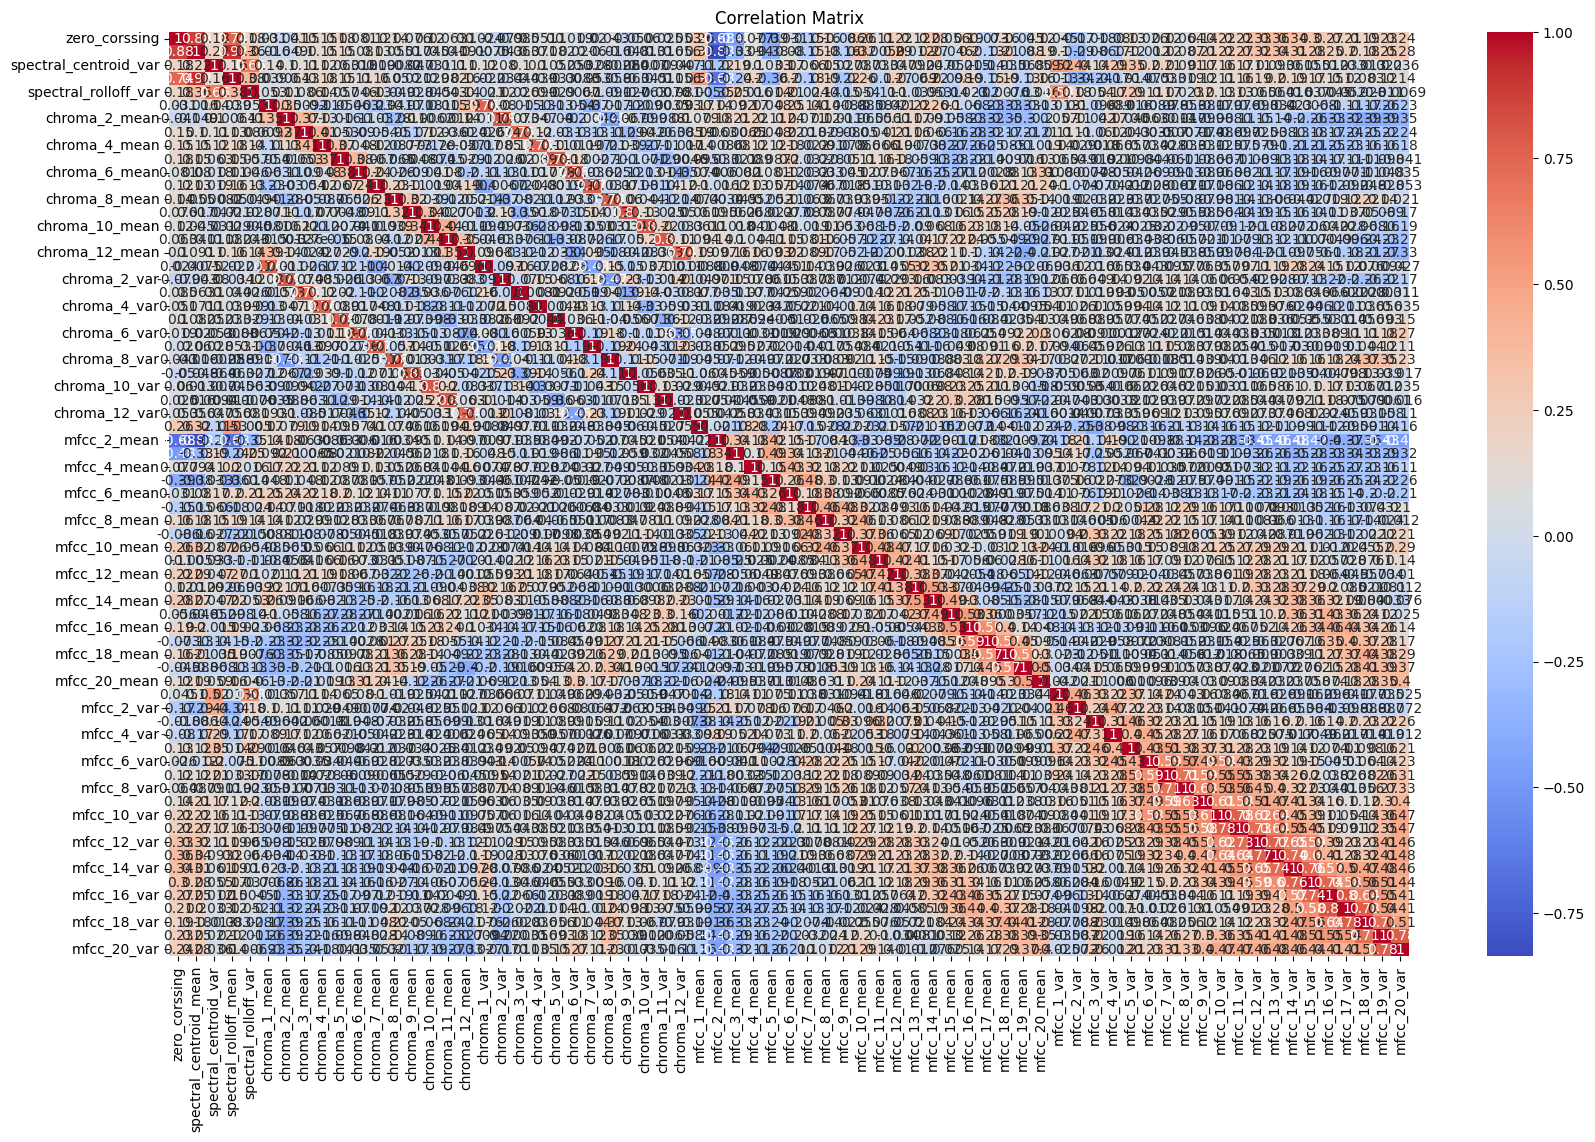

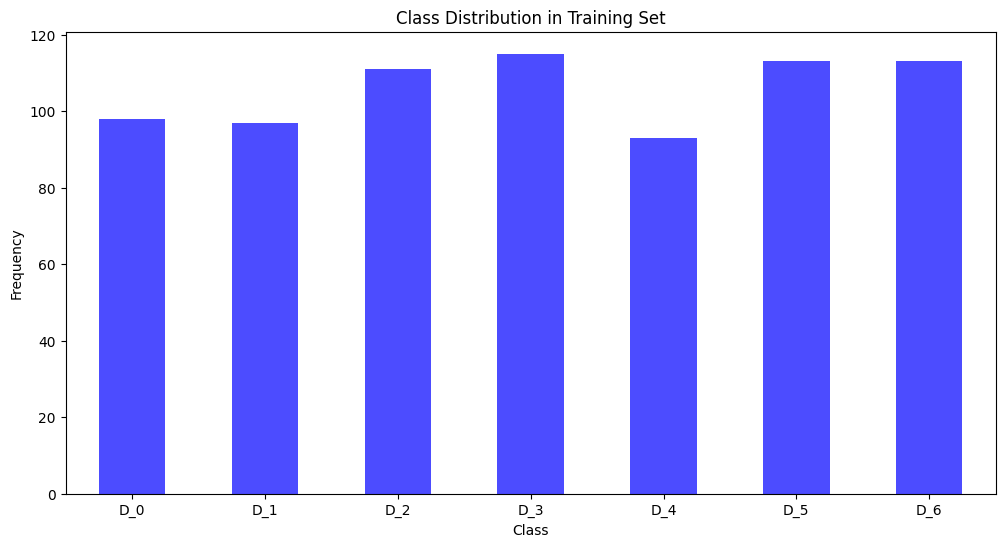

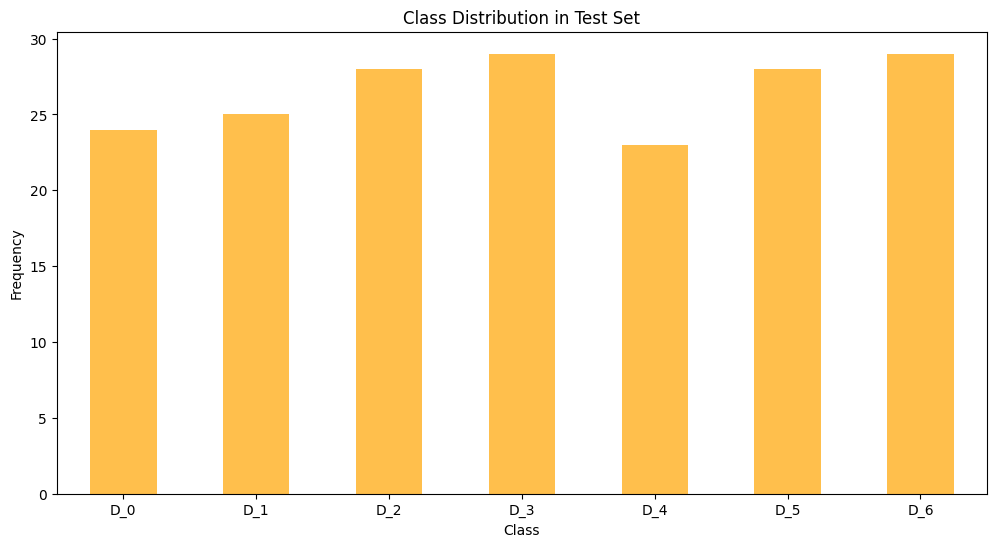

In [3]:
# Load dataset
file_path = "/content/MJMusicDataset.csv"
data = pd.read_csv(file_path)

# Split the dataset into features and labels
data = data.drop(columns=['instrument',"name"])

# Split the dataset into features and labels
X = data.drop(columns=['dastgah'])
y = data['dastgah']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=53, stratify=y)

# Plot the correlation matrix
plt.figure(figsize=(20, 12))
correlation_matrix = X_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Plot distribution of the train set
plt.figure(figsize=(12, 6))
y_train.value_counts().sort_index().plot(kind='bar', alpha=0.7, color='blue')
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# Plot distribution of the test set
plt.figure(figsize=(12, 6))
y_test.value_counts().sort_index().plot(kind='bar', alpha=0.7, color='orange')
plt.title('Class Distribution in Test Set')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


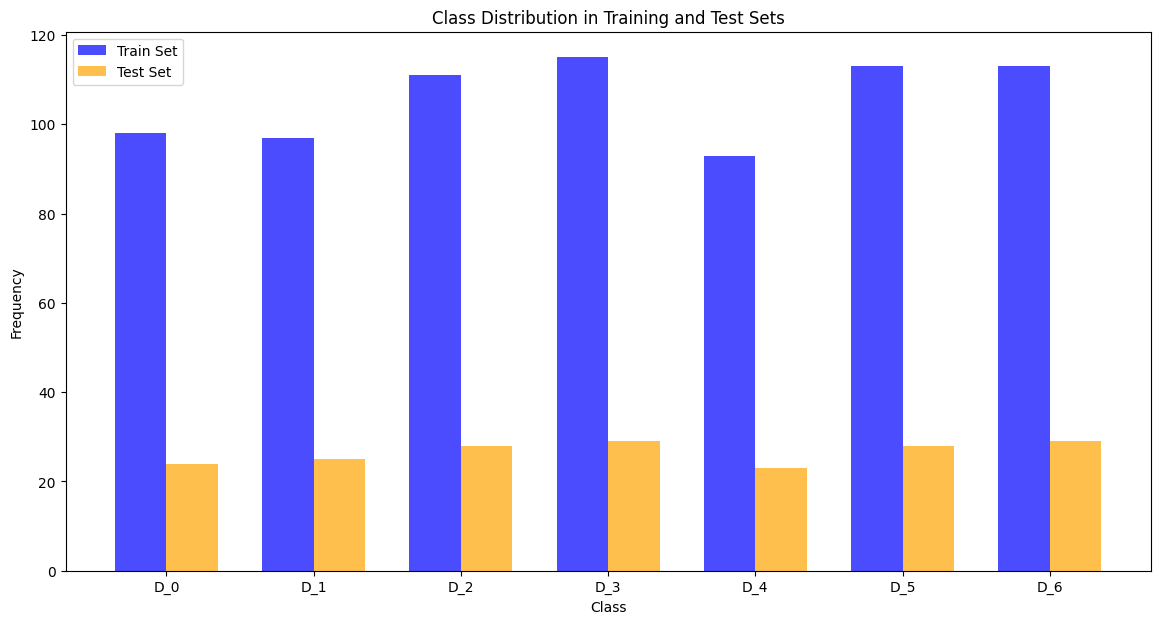

In [19]:

# Get the value counts for train and test sets
train_counts = y_train.value_counts().sort_index()
test_counts = y_test.value_counts().sort_index()

# Combine the counts into a DataFrame for easier plotting
counts_df = pd.DataFrame({'Train': train_counts, 'Test': test_counts})

# Plotting the distributions
plt.figure(figsize=(14, 7))
bar_width = 0.35
indices = np.arange(len(train_counts))

# Train set bars
plt.bar(indices, counts_df['Train'], bar_width, label='Train Set', color='blue', alpha=0.7)

# Test set bars (offset by bar_width)
plt.bar(indices + bar_width, counts_df['Test'], bar_width, label='Test Set', color='orange', alpha=0.7)

# Setting the plot details
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution in Training and Test Sets')
plt.xticks(indices + bar_width / 2, counts_df.index, rotation=0)
plt.legend()

# Show the plot
plt.show()


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

# Use SVM with linear kernel for RFE
svc = SVC(kernel='linear', C=1)
rfe = RFE(estimator=svc, n_features_to_select=2, step=1)
rfe.fit(X_train, y_train)

# Get RFE results
ranking = rfe.ranking_
features_ranking = pd.DataFrame({'Feature': X_train.columns, 'Ranking': ranking})
features_ranking = features_ranking.sort_values(by='Ranking')

# Plot the RFE feature ranking
plt.figure(figsize=(14, 7))
plt.title('Feature Ranking using RFE')
plt.barh(features_ranking['Feature'], features_ranking['Ranking'], align='center')
plt.xlabel('Ranking')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()


Confusion Matrix for Linear Kernel:


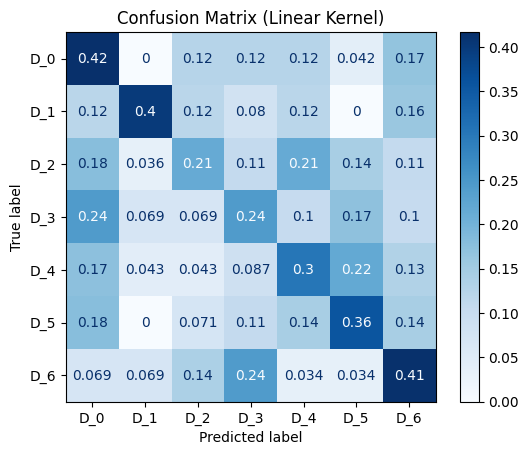


Classification Report for Linear Kernel:
              precision    recall  f1-score   support

         D_0       0.28      0.42      0.33        24
         D_1       0.62      0.40      0.49        25
         D_2       0.29      0.21      0.24        28
         D_3       0.26      0.24      0.25        29
         D_4       0.26      0.30      0.28        23
         D_5       0.38      0.36      0.37        28
         D_6       0.36      0.41      0.39        29

    accuracy                           0.33       186
   macro avg       0.35      0.34      0.34       186
weighted avg       0.35      0.33      0.34       186

Confusion Matrix for RBF Kernel:


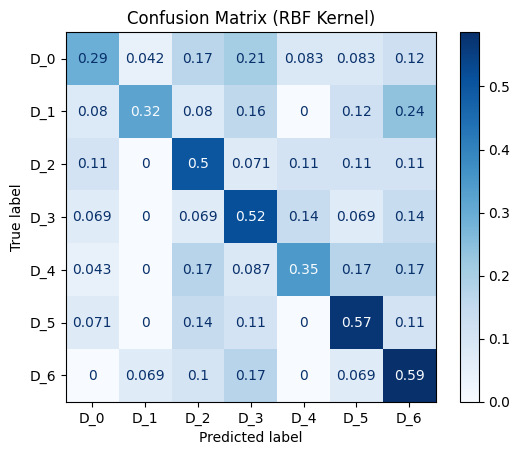


Classification Report for RBF Kernel:
              precision    recall  f1-score   support

         D_0       0.41      0.29      0.34        24
         D_1       0.73      0.32      0.44        25
         D_2       0.42      0.50      0.46        28
         D_3       0.42      0.52      0.46        29
         D_4       0.47      0.35      0.40        23
         D_5       0.50      0.57      0.53        28
         D_6       0.42      0.59      0.49        29

    accuracy                           0.46       186
   macro avg       0.48      0.45      0.45       186
weighted avg       0.48      0.46      0.45       186



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM with linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)

# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)

# Confusion matrix and classification report for linear kernel
print("Confusion Matrix for Linear Kernel:")
cm_linear = confusion_matrix(y_test, y_pred_linear, normalize='true')
cmd_linear = ConfusionMatrixDisplay(cm_linear, display_labels=svm_linear.classes_)
cmd_linear.plot(cmap='Blues')
plt.title('Confusion Matrix (Linear Kernel)')
plt.show()

print("\nClassification Report for Linear Kernel:")
print(classification_report(y_test, y_pred_linear))

# Confusion matrix and classification report for RBF kernel
print("Confusion Matrix for RBF Kernel:")
cm_rbf = confusion_matrix(y_test, y_pred_rbf, normalize='true')
cmd_rbf = ConfusionMatrixDisplay(cm_rbf, display_labels=svm_rbf.classes_)
cmd_rbf.plot(cmap='Blues')
plt.title('Confusion Matrix (RBF Kernel)')
plt.show()

print("\nClassification Report for RBF Kernel:")
print(classification_report(y_test, y_pred_rbf))




Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_para

Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score: 0.41891891891891897


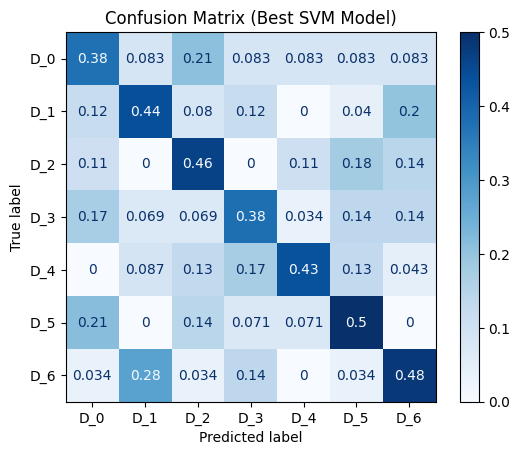


Classification Report:
              precision    recall  f1-score   support

         D_0       0.33      0.38      0.35        24
         D_1       0.44      0.44      0.44        25
         D_2       0.43      0.46      0.45        28
         D_3       0.42      0.38      0.40        29
         D_4       0.56      0.43      0.49        23
         D_5       0.47      0.50      0.48        28
         D_6       0.47      0.48      0.47        29

    accuracy                           0.44       186
   macro avg       0.45      0.44      0.44       186
weighted avg       0.45      0.44      0.44       186



In [8]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', "polynomial"]
}

# Perform GridSearchCV with K-Fold Cross-Validation
grid_search = GridSearchCV(SVC(), param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train the final SVM model with the best parameters
best_svm = grid_search.best_estimator_
best_svm.fit(X_train_scaled, y_train)

# Predictions and evaluations
y_pred = best_svm.predict(X_test_scaled)

# Confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred, normalize='true')
cmd = ConfusionMatrixDisplay(cm, display_labels=best_svm.classes_)
cmd.plot(cmap='Blues')
plt.title('Confusion Matrix (Best SVM Model)')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Save the best parameters for future use
best_params = grid_search.best_params_

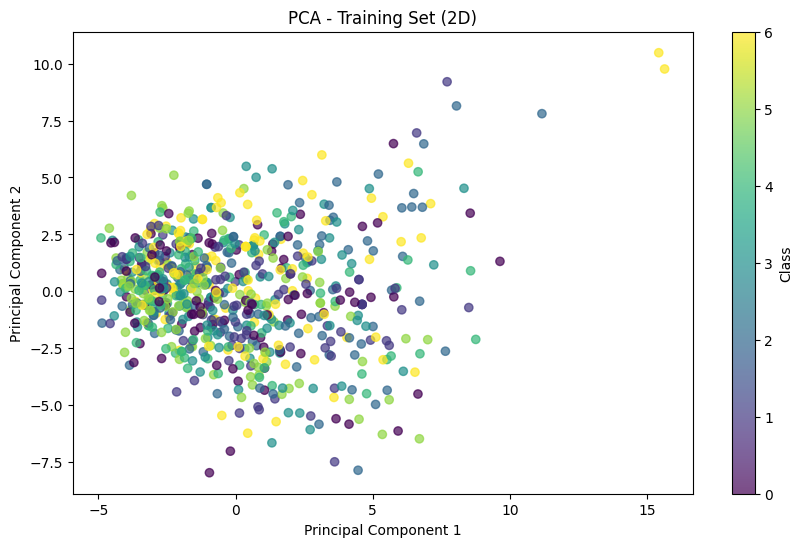

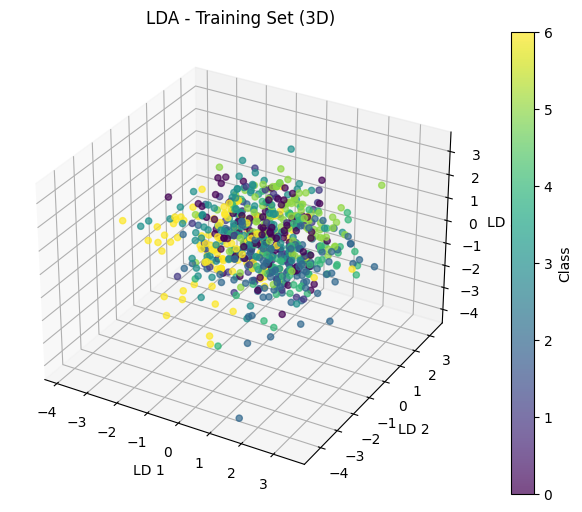

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.2s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.2s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.2s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.1s
[CV] END ..................................C=0.1

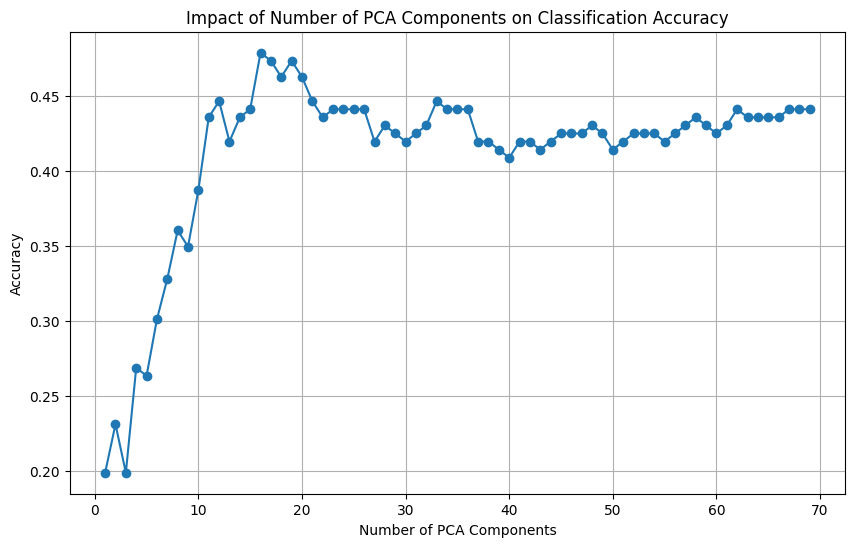

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from mpl_toolkits.mplot3d import Axes3D

# Load dataset
file_path = "/content/MJMusicDataset.csv"
data = pd.read_csv(file_path)

# Drop the 'instrument' column
data = data.drop(columns=['instrument',"name"])

# Encode the 'dastgah' column to integers
label_encoder = LabelEncoder()
data['dastgah'] = label_encoder.fit_transform(data['dastgah'])

# Split the dataset into features and labels
X = data.drop(columns=['dastgah'])
y = data['dastgah']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=53, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2,random_state=53)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Apply LDA to reduce dimensions to 3 for visualization
lda = LDA(n_components=3,)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# Plot PCA result in 2D
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.title('PCA - Training Set (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Class')
plt.show()

# Plot LDA result in 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_train_lda[:, 0], X_train_lda[:, 1], X_train_lda[:, 2], c=y_train, cmap='viridis', alpha=0.7)
ax.set_title('LDA - Training Set (3D)')
ax.set_xlabel('LD 1')
ax.set_ylabel('LD 2')
ax.set_zlabel('LD 3')
fig.colorbar(scatter, label='Class')
plt.show()


# Evaluate impact of different number of PCA components on classification accuracy
accuracy_results = []

# Parameter tuning using GridSearchCV for RBF kernel
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train_scaled, y_train)
best_params = grid.best_params_

for n_components in range(1, X_train_scaled.shape[1] + 1):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Train SVM with RBF kernel on the reduced data
    svm_rbf = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
    svm_rbf.fit(X_train_pca, y_train)
    accuracy = svm_rbf.score(X_test_pca, y_test)

    accuracy_results.append((n_components, accuracy))

# Convert results to DataFrame for plotting
accuracy_df = pd.DataFrame(accuracy_results, columns=['n_components', 'accuracy'])

# Plot the impact of the number of PCA components on classification accuracy
plt.figure(figsize=(10, 6))
plt.plot(accuracy_df['n_components'], accuracy_df['accuracy'], marker='o')
plt.title('Impact of Number of PCA Components on Classification Accuracy')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import GridSearchCV
import librosa

# Load dataset
file_path = "/content/MJMusicDataset.csv"
data = pd.read_csv(file_path)

# Drop the 'instrument' column
data = data.drop(columns=['instrument','name'])

# Extract a new feature: spectral centroid (placeholder for actual audio processing)

# Encode the 'dastgah' column to integers
label_encoder = LabelEncoder()
data['dastgah'] = label_encoder.fit_transform(data['dastgah'])

# Split the dataset into features and labels
X = data.drop(columns=['dastgah'])
y = data['dastgah']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Epoch 1/50
24/24 - 1s - loss: 1.2503 - val_loss: 1.2480 - 1s/epoch - 61ms/step
Epoch 2/50
24/24 - 0s - loss: 1.1990 - val_loss: 1.1954 - 176ms/epoch - 7ms/step
Epoch 3/50
24/24 - 0s - loss: 1.1453 - val_loss: 1.1365 - 157ms/epoch - 7ms/step
Epoch 4/50
24/24 - 0s - loss: 1.0871 - val_loss: 1.0744 - 161ms/epoch - 7ms/step
Epoch 5/50
24/24 - 0s - loss: 1.0316 - val_loss: 1.0198 - 153ms/epoch - 6ms/step
Epoch 6/50
24/24 - 0s - loss: 0.9868 - val_loss: 0.9778 - 136ms/epoch - 6ms/step
Epoch 7/50
24/24 - 0s - loss: 0.9531 - val_loss: 0.9458 - 193ms/epoch - 8ms/step
Epoch 8/50
24/24 - 0s - loss: 0.9268 - val_loss: 0.9226 - 208ms/epoch - 9ms/step
Epoch 9/50
24/24 - 0s - loss: 0.9068 - val_loss: 0.9037 - 220ms/epoch - 9ms/step
Epoch 10/50
24/24 - 0s - loss: 0.8900 - val_loss: 0.8891 - 224ms/epoch - 9ms/step
Epoch 11/50
24/24 - 0s - loss: 0.8763 - val_loss: 0.8766 - 271ms/epoch - 11ms/step
Epoch 12/50
24/24 - 0s - loss: 0.8642 - val_loss: 0.8659 - 463ms/epoch - 19ms/step
Epoch 13/50
24/24 - 0s - 

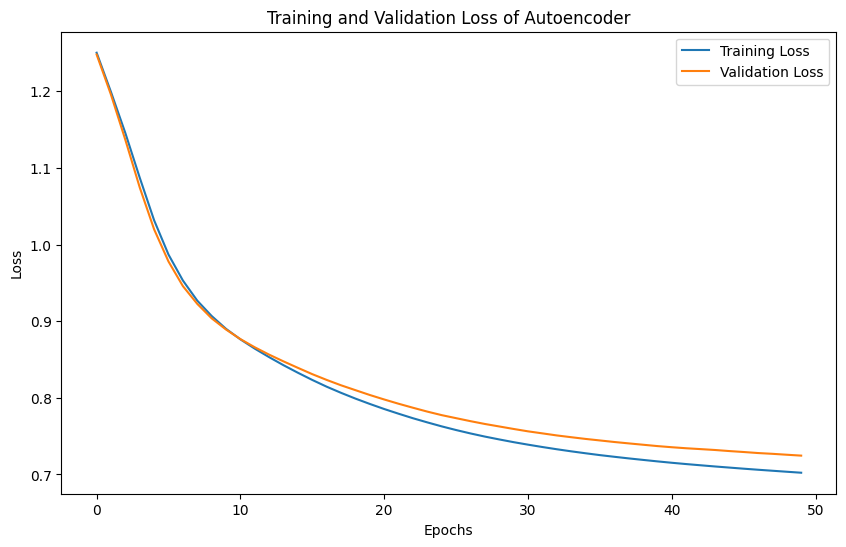

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Define the autoencoder
input_dim = X_train_scaled.shape[1]
encoding_dim = 15  # Number of dimensions to reduce to

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer=Adam(), loss='mse')

# Train the autoencoder
history = autoencoder.fit(X_train_scaled, X_train_scaled,
                          epochs=50,
                          batch_size=32,
                          validation_data=(X_test_scaled, X_test_scaled),
                          verbose=2)

# Extract features using the encoder part of the autoencoder
encoder_model = Model(inputs=input_layer, outputs=encoder)
X_train_encoded = encoder_model.predict(X_train_scaled)
X_test_encoded = encoder_model.predict(X_test_scaled)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss of Autoencoder')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.1s
[CV] END ..................................C=0.1

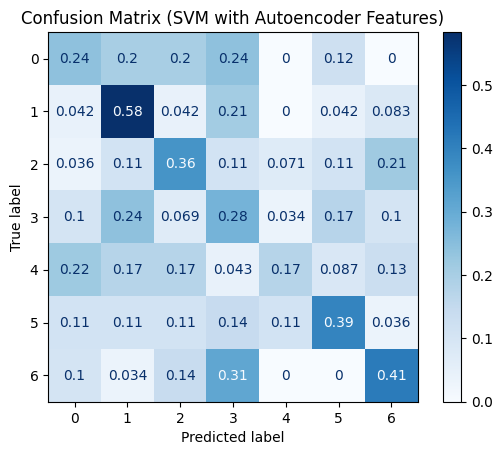


Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.24      0.26        25
           1       0.38      0.58      0.46        24
           2       0.34      0.36      0.35        28
           3       0.22      0.28      0.25        29
           4       0.40      0.17      0.24        23
           5       0.44      0.39      0.42        28
           6       0.44      0.41      0.43        29

    accuracy                           0.35       186
   macro avg       0.36      0.35      0.34       186
weighted avg       0.36      0.35      0.34       186



In [18]:
# Parameter tuning using GridSearchCV for RBF kernel
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train_encoded, y_train)
best_params = grid.best_params_

# Train the SVM classifier with the best parameters
svm_rbf = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
svm_rbf.fit(X_train_encoded, y_train)
y_pred = svm_rbf.predict(X_test_encoded)

# Confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred, normalize='true')
cmd = ConfusionMatrixDisplay(cm, display_labels=svm_rbf.classes_)
cmd.plot(cmap='Blues')
plt.title('Confusion Matrix (SVM with Autoencoder Features)')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [19]:
! gdown 1RJE6LaTm5_geFFQVkhntw1sdW2A6PDXx

Downloading...
From: https://drive.google.com/uc?id=1RJE6LaTm5_geFFQVkhntw1sdW2A6PDXx
To: /content/MJMusicDataset_Test.csv
100% 1.74k/1.74k [00:00<00:00, 3.49MB/s]


In [24]:
file_path = "/content/MJMusicDataset.csv"
data = pd.read_csv(file_path)

# Split the dataset into features and labels
data = data.drop(columns=['instrument',"name"])

# Split the dataset into features and labels
X = data.drop(columns=['dastgah'])
y = data['dastgah']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=53, stratify=y)

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_scaled, y_train)

SVC()

In [25]:
file_path = "/content/MJMusicDataset_Test.csv"
data = pd.read_csv(file_path)
svm_rbf.predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


ValueError: X has 69 features, but SVC is expecting 70 features as input.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Load dataset
file_path = "/content/MJMusicDataset.csv"
data = pd.read_csv(file_path)

# Drop the 'instrument' column
data = data.drop(columns=['instrument','name'])

# Extract a new feature: spectral centroid (placeholder for actual audio processing)
# Here, we'll simulate extracting the spectral centroid by generating random values for simplicity
# Replace this with actual audio feature extraction using librosa or another library if you have the audio files
data['spectral_centroid'] = np.random.random(size=len(data))

# Encode the 'dastgah' column to integers
label_encoder = LabelEncoder()
data['dastgah'] = label_encoder.fit_transform(data['dastgah'])

# Split the dataset into features and labels
X = data.drop(columns=['dastgah'])
y = data['dastgah']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=53, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Build a deeper DNN model
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train_encoded.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                4544      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 7)                 231       
                                                                 
Total params: 6855 (26.78 KB)
Trainable params: 6855 (26.78 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
# Train the DNN model
history = model.fit(X_train_scaled, y_train_encoded,
                    epochs=300,
                    batch_size=256,
                    validation_data=(X_test_scaled, y_test_encoded),
                    verbose=2)


Epoch 1/300
3/3 - 0s - loss: 1.5836 - accuracy: 0.3784 - val_loss: 1.7022 - val_accuracy: 0.4032 - 315ms/epoch - 105ms/step
Epoch 2/300
3/3 - 0s - loss: 1.5619 - accuracy: 0.3851 - val_loss: 1.7015 - val_accuracy: 0.4032 - 204ms/epoch - 68ms/step
Epoch 3/300
3/3 - 0s - loss: 1.5951 - accuracy: 0.3932 - val_loss: 1.7008 - val_accuracy: 0.4032 - 97ms/epoch - 32ms/step
Epoch 4/300
3/3 - 0s - loss: 1.5828 - accuracy: 0.3568 - val_loss: 1.7003 - val_accuracy: 0.4032 - 141ms/epoch - 47ms/step
Epoch 5/300
3/3 - 0s - loss: 1.5668 - accuracy: 0.4027 - val_loss: 1.7001 - val_accuracy: 0.4032 - 150ms/epoch - 50ms/step
Epoch 6/300
3/3 - 0s - loss: 1.5578 - accuracy: 0.3986 - val_loss: 1.6999 - val_accuracy: 0.4032 - 151ms/epoch - 50ms/step
Epoch 7/300
3/3 - 0s - loss: 1.5628 - accuracy: 0.3865 - val_loss: 1.6999 - val_accuracy: 0.4032 - 150ms/epoch - 50ms/step
Epoch 8/300
3/3 - 0s - loss: 1.5853 - accuracy: 0.4041 - val_loss: 1.7000 - val_accuracy: 0.4032 - 176ms/epoch - 59ms/step
Epoch 9/300
3/3 

Test Accuracy: 0.4462
6/6 [==============================] - 0s 3ms/step


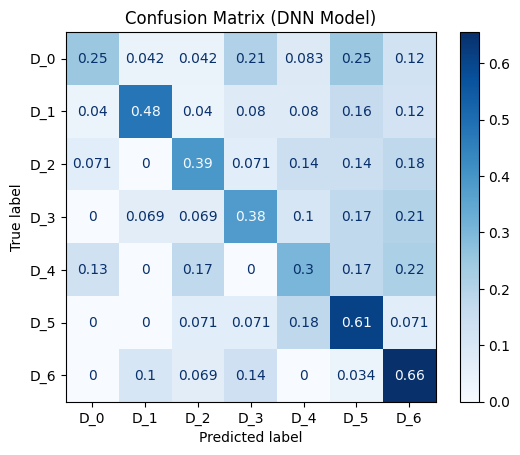


Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.25      0.33        24
           1       0.67      0.48      0.56        25
           2       0.48      0.39      0.43        28
           3       0.42      0.38      0.40        29
           4       0.30      0.30      0.30        23
           5       0.41      0.61      0.49        28
           6       0.44      0.66      0.53        29

    accuracy                           0.45       186
   macro avg       0.46      0.44      0.44       186
weighted avg       0.46      0.45      0.44       186



In [36]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')

# Predictions
y_pred_encoded = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_encoded, axis=1)

# Confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred, normalize='true')
cmd = ConfusionMatrixDisplay(cm, display_labels=label_encoder.classes_)
cmd.plot(cmap='Blues')
plt.title('Confusion Matrix (DNN Model)')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


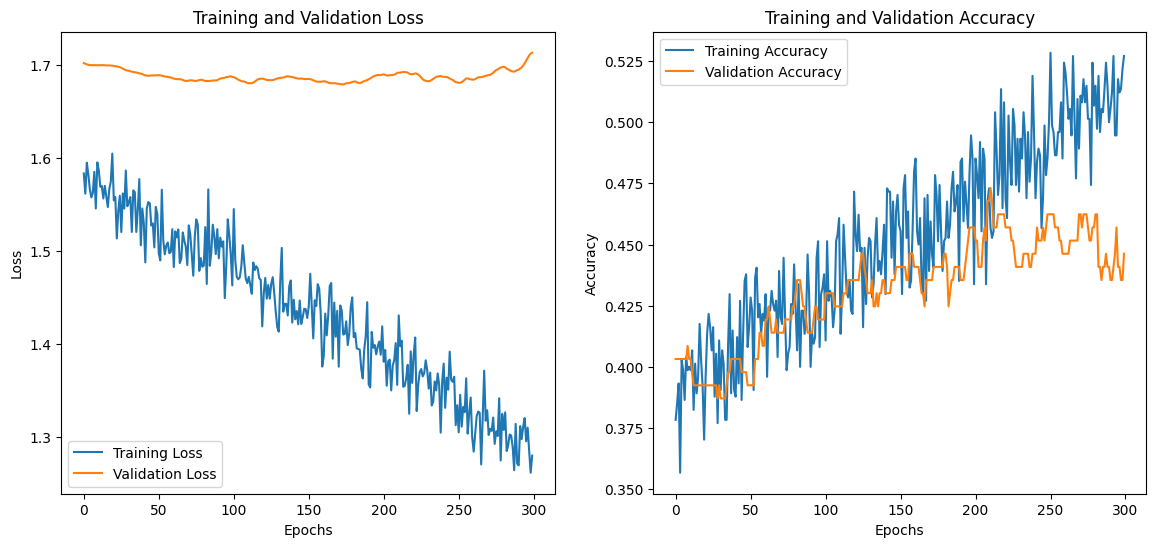

In [37]:
# Plot training and validation loss
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
